In [2]:
%matplotlib inline

import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

from astroplan import Observer, FixedTarget
from astropy.time import Time
from astropy.coordinates import SkyCoord
from astroplan.plots import plot_sky, plot_airmass

import warnings
warnings.filterwarnings('ignore', category=Warning)

#use airmass to determine best observatory for each object

In [3]:
now = Time.now()

CAhome = Observer(longitude = -117.8825136 * u.deg,
                  latitude = 40.7697771 * u.deg,
                  elevation = 37.1856 * u.m,
                  name = "CAhome")

astrolab = Observer(longitude = -122.3115 * u.deg,
                    latitude = 47.65371 * u.deg,
                    elevation = 63.4 * u.m,
                    name = "Astrolab")


mko = Observer(longitude = -155.4733 * u.deg,
               latitude =19.824 * u.deg,
               elevation=4159 * u.m,
               name = "MKO")

sso = Observer(longitude = 148.0644 * u.deg,
               latitude = -31.2733 * u.deg,
               elevation= 1165 * u.m,
               name = "SSO")

lpo = Observer(longitude = -17.8947 * u.deg,
               latitude = 28.7636 * u.deg,
               elevation= 2396 * u.m,
               name = "LPO")
sunset_mko = mko.sun_set_time(now, which='nearest') #which sunrise or sunset
sunrise_mko = mko.sun_rise_time(now, which='next')
midnight_mko = mko.midnight(now, which='next')
sunset_sso = sso.sun_set_time(now, which='nearest') #which sunrise or sunset
sunrise_sso = sso.sun_rise_time(now, which='next')
midnight_sso = sso.midnight(now, which='next')
sunset_LPO = lpo.sun_set_time(now, which='nearest') #which sunrise or sunset
sunrise_LPO = lpo.sun_rise_time(now, which='next')
midnight_LPO = lpo.midnight(now, which='next')

midnight_lab = astrolab.midnight(now, which='next')

sunset_CAhome = CAhome.sun_set_time(now, which='nearest')
sunrise_CAhome = CAhome.sun_rise_time(now, which='next')
midnight_CAhome = CAhome.midnight(now, which ='next')

<SkyCoord (ICRS): (ra, dec) in deg
    (274.7, -13.8067)>


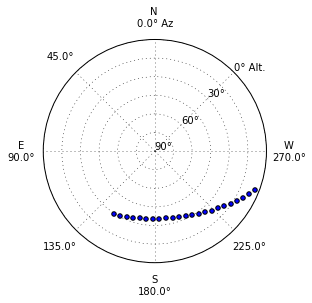

In [5]:
obj = FixedTarget.from_name("Eagle Nebula")

print (obj.coord)


#current
date_obs = Time("2016-3-19 00:00:00", format='iso')

date_obj_highest = Time("2016-06-25 00:00:00", format='iso')

obs = CAhome

#change to date_obj_highest
astro_set = obs.twilight_evening_astronomical(date_obs, which='nearest')
astro_rise = obs.twilight_morning_astronomical(date_obs, which='nearest')

start_time = astro_set
end_time = astro_rise
delta_t = end_time - start_time
observe_time = start_time + delta_t * np.linspace(0.0, 1.0, 50)

plot_sky(obj, obs, observe_time) 
#plot_airmass(obj, obs, observe_time)